### Table Of Contents <a class="anchor" id="menu"></a>

* [Steps](#main)
    * [Project Intro](#project)
    * [0. Data Collection](#dc)
    * [1. Data Validation & Basic Cleaning](#dv)
    
        @ Insights
    
    * [2. Data Understanding (EDA)](#eda)
    * [3. Missing Values & Outliers Handling](#naout)
    
        @ Predictive Modeling
    * [4. Predictive Modeling (Machine Learning)](#pm)
        * [4.1 X & y](#xy)
        * [4.2 Feature Engineering](#fe)
        * [4.3 Train-Test Split](#tt)
        * [4.4 Model Selection & Training](#model)
        * [4.5 & 4.6 Test Predictions & Evaluation](#eval)
        * [4.7 Selecting Better Performance Model](#best)
        * [4.8 Hypparam Tuning For Best Model(if required)](#hyp)
        * [4.9 Saving Better Performance Model](#dep)
        * [4.10 Real Time Prediction](#pred)

### Project Particulars<a id='project'>

[Back to Top](#menu)

**Business/Domain:** Automobiles

**Goal:** Studying of Fuel Consumption for different types of vehicles and building a predictive model to estimate fuel consumption for a given vehicle details.

<img src='https://kenganleybuyingcenterboardman.com/wp-content/uploads/fuel-saving-driving-tips-16466479091.jpg' width=500px height=500px>

**Most Affecting Factors/Features for Goal:** Engine, Running Conditions, FuelType, Brand, etc...

### Steps

In [1]:
# Base Libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### 0. Data Collection<a class="anchor" id="dc"></a>

[Back To Top](#menu)

**Data for Goal**: Taken Open Sources Data matching above factors
                       
   Source: https://natural-resources.canada.ca/

In [2]:
# Reading collected data file as pandas df

raw = pd.read_excel("FuelConsumption Data.xlsx", sheet_name='Data')

In [3]:
raw

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


**Data Info:**
- We are having 946 vehicles info having 15 factors

Column|Description
------------|--------
Model Year|Model release year
Make|The Brand of the vehicle
Model|Model refers to the specific vehicle model
Vehicle Class|The capacity of vehicle
Engine Size|"Total displacement of all cylinders (in litres [L]); electric motor peak power output (in kilowatts [kW]); number of engine cylinders"
Cylindres|Number of Cylinders
Transmission|A = Automatic; AM = Automated manual; AS = Automatic with select shift; AV = Continuously variable; M = Manual; Number of gears/speeds (1–10)
Fuel Type|X = Regular gasoline; Z = Premium gasoline; D = Diesel; E = E85; B = Electricity; N = Natural gas
Fuel Consumption (City (L/100 km)|City and highway fuel consumption ratings are shown in liters per 100 kilometers (L/100 km) - the combined rating is shown in L/100 km and in miles per imperial gallon (mpg)
Fuel Consumption(Hwy (L/100 km))|
Fuel Consumption(Comb (L/100 km))|	
Fuel Consumption(Comb (mpg))|	
CO2 Emissions(g/km)|The tailpipe emissions of carbon dioxide (in grams per kilometer) for combined city and highway driving
CO2 Rating|The tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)
Smog Rating|The tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)

* **Basic Checks**

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

### 1. Data Validation <a class='anchor' id='dv'></a>

[Back To Top](#menu)

**1.1 Validating each and every column data**

In [5]:
# Loading User-Defined Module function for Data Validation

from dval import colvalidate

In [6]:
# Applying above function to each and every column

for col in raw.columns:
    colvalidate(raw, col)

Column: Model Year

Number of Unique Values: 1

Unique Values In Column:
[2022]

Data Type of Column: int64

Column: Min -> 2022 & Max -> 2022

Column: Make

Number of Unique Values: 39

Unique Values In Column:
['Acura' 'Alfa Romeo' 'Aston Martin' 'Audi' 'Bentley' 'BMW' 'Bugatti'
 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge' 'FIAT' 'Ford' 'Genesis'
 'GMC' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Kia' 'Lamborghini'
 'Land Rover' 'Lexus' 'Lincoln' 'Maserati' 'Mazda' 'Mercedes-Benz' 'MINI'
 'Mitsubishi' 'Nissan' 'Porsche' 'Ram' 'Rolls-Royce' 'Subaru' 'Toyota'
 'Volkswagen' 'Volvo']

Data Type of Column: object

Column: Model

Number of Unique Values: 715

Unique Values In Column:
['ILX' 'MDX SH-AWD' 'RDX SH-AWD' 'RDX SH-AWD A-SPEC' 'TLX SH-AWD'
 'TLX SH-AWD A-SPEC' 'TLX Type S' 'TLX Type S (Performance Tire)' 'Giulia'
 'Giulia AWD' 'Giulia Quadrifoglio' 'Stelvio' 'Stelvio AWD'
 'Stelvio AWD Quadrifoglio' 'DB11 V8' 'DB11 V12' 'DBS V12' 'DBX V8'
 'Vantage V8' 'A3 Sedan 40 TFSI qu

In [7]:
# Year column is only having single value , considering drop

del raw['Model Year']

In [8]:
# Model Column is having large text values, for the analysis purpose we can drop it

del raw["Model"]

In [9]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Make                               946 non-null    object 
 1   Vehicle Class                      946 non-null    object 
 2   Engine Size(L)                     946 non-null    float64
 3   Cylinders                          946 non-null    int64  
 4   Transmission                       946 non-null    object 
 5   Fuel Type                          946 non-null    object 
 6   Fuel Consumption (City (L/100 km)  946 non-null    float64
 7   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 8   Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 9   Fuel Consumption(Comb (mpg))       946 non-null    int64  
 10  CO2 Emissions(g/km)                946 non-null    int64  
 11  CO2 Rating                         946 non-null    int64  

* All the other columns data looks valid and data type is also proper

**1.2 Duplicated rows Identification & Handling**

In [10]:
# Converting Cat cols to lower case

for col in raw.columns:
    if raw[col].dtype==object:
        raw[col] = raw[col].str.lower()

In [11]:
raw.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,acura,compact,2.4,4,am8,z,9.9,7.0,8.6,33,200,6,3
1,acura,suv: small,3.5,6,as10,z,12.6,9.4,11.2,25,263,4,5
2,acura,suv: small,2.0,4,as10,z,11.0,8.6,9.9,29,232,5,6
3,acura,suv: small,2.0,4,as10,z,11.3,9.1,10.3,27,242,5,6
4,acura,compact,2.0,4,as10,z,11.2,8.0,9.8,29,230,5,7


In [12]:
# Checking for duplicates

display(raw[raw.duplicated()])
print()
print(f"Number of Rows Duplicated: {len(raw[raw.duplicated()])}")

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
16,aston martin,minicompact,5.2,12,a8,z,16.4,10.7,13.8,20,324,3,3
29,audi,mid-size,3.0,6,am7,z,11.1,7.8,9.6,29,224,5,5
35,audi,suv: small,2.0,4,am7,z,10.3,8.4,9.4,30,220,5,5
38,audi,suv: standard,3.0,6,as8,z,12.8,10.5,11.7,24,273,4,5
41,audi,two-seater,5.2,10,am7,z,16.7,10.3,13.8,20,322,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,porsche,full-size,4.0,8,am8,z,15.3,11.2,13.5,21,326,3,3
840,rolls-royce,station wagon: mid-size,6.7,12,as8,z,20.1,12.1,16.5,17,386,2,3
842,rolls-royce,full-size,6.7,12,as8,z,19.9,12.7,16.7,17,387,2,3
843,rolls-royce,full-size,6.7,12,as8,z,19.9,12.7,16.7,17,387,2,3



Number of Rows Duplicated: 103


In [13]:
# Droping Duplicated rows

raw = raw.drop_duplicates().reset_index(drop=True)

In [14]:
raw.shape

(843, 13)

### 2. Data Understanding @ EDA (Exploratory Data Analysis):  <a id='eda'>

[Back to Top](#menu)

In [15]:
# Viz Libraries

import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode
import plotly.express as px

init_notebook_mode(connected=True)

In [16]:
# Taking copy of validated data

data = raw.copy()

EDA Techniques:

Uni-Variate|Bi-Variate|Multi-Variate
---|-----|------
Data study of single column|Data study between two columns|Data Study between three or more columns

                                                        Uni-Variate

* Taking Using User-Defined Module Univariate Class

In [17]:
from eda import univariate

In [18]:
uni = univariate()

#######################################################
Taken Categorical Column: Make
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 39
Category Names:
['acura' 'alfa romeo' 'aston martin' 'audi' 'bentley' 'bmw' 'bugatti'
 'buick' 'cadillac' 'chevrolet' 'chrysler' 'dodge' 'fiat' 'ford' 'genesis'
 'gmc' 'honda' 'hyundai' 'infiniti' 'jaguar' 'jeep' 'kia' 'lamborghini'
 'land rover' 'lexus' 'lincoln' 'maserati' 'mazda' 'mercedes-benz' 'mini'
 'mitsubishi' 'nissan' 'porsche' 'ram' 'rolls-royce' 'subaru' 'toyota'
 'volkswagen' 'volvo']

Value Counts (FD) of each Category:
Make
ford             88
chevrolet        72
porsche          58
toyota           51
gmc              46
mercedes-benz    42
bmw              38
audi             37
jeep             33
hyundai          29
lexus            26
cadillac         25
kia              24
nissan           23
honda            23
mazda            23
subaru           1


#######################################################
Taken Categorical Column: Vehicle Class
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 14
Category Names:
['compact' 'suv: small' 'mid-size' 'minicompact' 'suv: standard'
 'two-seater' 'subcompact' 'station wagon: small'
 'station wagon: mid-size' 'full-size' 'pickup truck: small'
 'pickup truck: standard' 'minivan' 'special purpose vehicle']

Value Counts (FD) of each Category:
Vehicle Class
suv: small                 189
pickup truck: standard     112
suv: standard              110
mid-size                   105
subcompact                  70
compact                     68
full-size                   54
minicompact                 43
two-seater                  30
pickup truck: small         20
station wagon: small        18
special purpose vehicle     11
station wagon: mid-size      7
minivan                      6
Name: count, dtype: int64

Valu


#######################################################
Taken Numeric Continuous Column: Engine Size(L)
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 3.1
Median: 2.9
Mode: 2.0

******** Measures of Dispersion ************
Range: 6.8
Variance: 1.75
Standard Deviation: 1.32
Five Number Summary:
min   1.20
25%   2.00
50%   2.90
75%   3.60
max   8.00
Name: Engine Size(L), dtype: float64

******** Measures of Symmetry ************
Skewness: 1.04
Kurtosis: 0.35

Visual - Distplot (Histogram + Desnsity plot):



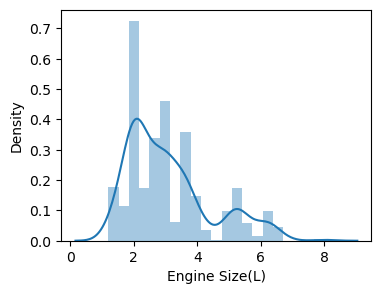

#######################################################
Taken Numeric Discrete Column: Cylinders
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 5
Median: 6
Mode: 4

******** Measures of Dispersion ************
Range: 13
Variance: 3
Standard Deviation: 2
Five Number Summary:
min    3.00
25%    4.00
50%    6.00
75%    6.00
max   16.00
Name: Cylinders, dtype: float64

******** Measures of Symmetry ************
Skewness: 1.29
Kurtosis: 2.9

Visual - Distplot (Histogram + Desnsity plot):



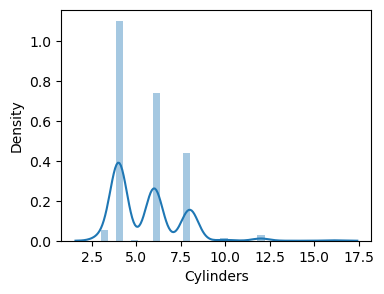


#######################################################
Taken Categorical Column: Transmission
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 23
Category Names:
['am8' 'as10' 'a8' 'a9' 'am7' 'as8' 'm6' 'as6' 'av' 'as9' 'a10' 'a6' 'm5'
 'm7' 'av7' 'av1' 'am6' 'as7' 'av8' 'av6' 'av10' 'as5' 'a7']

Value Counts (FD) of each Category:
Transmission
as8     173
a8       92
as10     85
a9       63
m6       60
a10      56
am7      55
am8      46
av       43
as6      37
a6       24
av8      23
as9      19
m7       13
av7      10
am6       9
av6       8
av10      8
as7       7
m5        5
av1       4
as5       2
a7        1
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Transmission
as8    20.52
a8     10.91
as10   10.08
a9      7.47
m6      7.12
a10     6.64
am7     6.52
am8     5.46
av      5.10
as6     4.39
a6      2.85
av8     2.73
as9     2.25
m7      1.54
av7     1.19
am6     1.07



#######################################################
Taken Categorical Column: Fuel Type
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 4
Category Names:
['z' 'x' 'd' 'e']

Value Counts (FD) of each Category:
Fuel Type
x    434
z    370
d     25
e     14
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Fuel Type
x   51.48
z   43.89
d    2.97
e    1.66
Name: count, dtype: float64

Mode: x

Visual - Pie Chart:

Top Catgeories:



#######################################################
Taken Numeric Continuous Column: Fuel Consumption (City (L/100 km)
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 12.25
Median: 12.0
Mode: 12.8

******** Measures of Dispersion ************
Range: 26.3
Variance: 11.36
Standard Deviation: 3.37
Five Number Summary:
min    4.00
25%   10.05
50%   12.00
75%   14.30
max   30.30
Name: Fuel Consumption (City (L/100 km), dtype: float64

******** Measures of Symmetry ************
Skewness: 0.73
Kurtosis: 1.82

Visual - Distplot (Histogram + Desnsity plot):



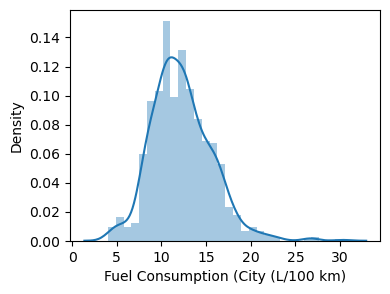

#######################################################
Taken Numeric Continuous Column: Fuel Consumption(Hwy (L/100 km))
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 9.22
Median: 9.0
Mode: 8.7

******** Measures of Dispersion ************
Range: 17.0
Variance: 5.16
Standard Deviation: 2.27
Five Number Summary:
min    3.90
25%    7.60
50%    9.00
75%   10.50
max   20.90
Name: Fuel Consumption(Hwy (L/100 km)), dtype: float64

******** Measures of Symmetry ************
Skewness: 0.85
Kurtosis: 1.49

Visual - Distplot (Histogram + Desnsity plot):



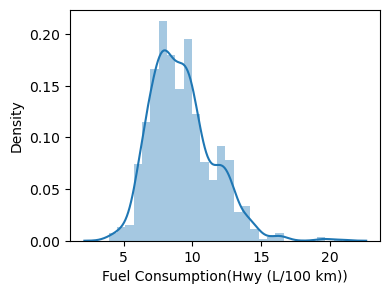

#######################################################
Taken Numeric Continuous Column: Fuel Consumption(Comb (L/100 km))
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 10.89
Median: 10.6
Mode: 9.1

******** Measures of Dispersion ************
Range: 22.1
Variance: 7.99
Standard Deviation: 2.83
Five Number Summary:
min    4.00
25%    9.00
50%   10.60
75%   12.60
max   26.10
Name: Fuel Consumption(Comb (L/100 km)), dtype: float64

******** Measures of Symmetry ************
Skewness: 0.74
Kurtosis: 1.55

Visual - Distplot (Histogram + Desnsity plot):



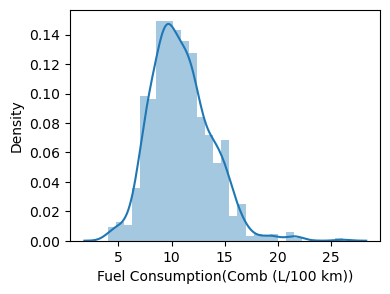

#######################################################
Taken Numeric Discrete Column: Fuel Consumption(Comb (mpg))
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 28
Median: 27
Mode: 24

******** Measures of Dispersion ************
Range: 60
Variance: 60
Standard Deviation: 8
Five Number Summary:
min   11.00
25%   22.00
50%   27.00
75%   31.00
max   71.00
Name: Fuel Consumption(Comb (mpg)), dtype: float64

******** Measures of Symmetry ************
Skewness: 1.38
Kurtosis: 4.04

Visual - Distplot (Histogram + Desnsity plot):



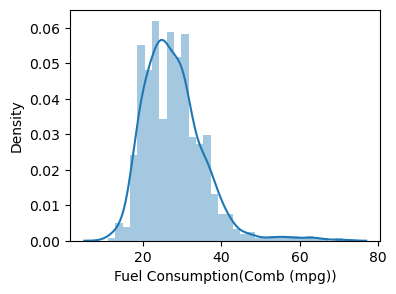


#######################################################
Taken Numeric Discrete Column: CO2 Emissions(g/km)
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 254
Median: 252
Mode: 252

******** Measures of Dispersion ************
Range: 514
Variance: 3949
Standard Deviation: 63
Five Number Summary:
min    94.00
25%   210.00
50%   252.00
75%   293.00
max   608.00
Name: CO2 Emissions(g/km), dtype: float64

******** Measures of Symmetry ************
Skewness: 0.52
Kurtosis: 1.28

Visual - Distplot (Histogram + Desnsity plot):



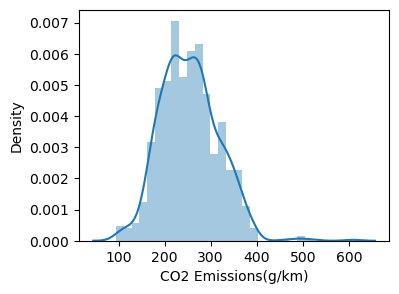


#######################################################
Taken Numeric Discrete Column: CO2 Rating
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 5
Median: 5
Mode: 5

******** Measures of Dispersion ************
Range: 9
Variance: 2
Standard Deviation: 1
Five Number Summary:
min    1.00
25%    4.00
50%    5.00
75%    5.00
max   10.00
Name: CO2 Rating, dtype: float64

******** Measures of Symmetry ************
Skewness: 0.39
Kurtosis: 0.33

Visual - Distplot (Histogram + Desnsity plot):



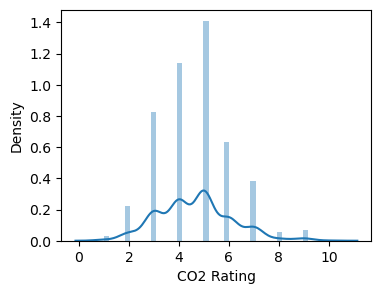


#######################################################
Taken Numeric Discrete Column: Smog Rating
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 5
Median: 5
Mode: 5

******** Measures of Dispersion ************
Range: 6
Variance: 3
Standard Deviation: 2
Five Number Summary:
min   1.00
25%   5.00
50%   5.00
75%   6.00
max   7.00
Name: Smog Rating, dtype: float64

******** Measures of Symmetry ************
Skewness: -0.76
Kurtosis: -0.05

Visual - Distplot (Histogram + Desnsity plot):



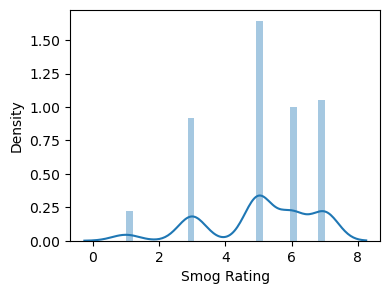

In [19]:
for col in data.columns:
    if data[col].dtype == object:
        uni.catstudy(data, col)
    elif data[col].dtype == 'float64':
        uni.ncstudy(data, col)
    elif data[col].dtype == 'int64':
        uni.ndstudy(data, col)
    elif data[col].dtype == 'datetime64[ns]':
        uni.datestudy(data, col)

Insights:

* Top brands are ford, chevrolet
* Suv-Small Size vehicles are more
* Avg Engine Size 3.1
* Avg Cylinders per vehicle is 5
* As8 Transmission vehicles are more
* z & x fuel type vehicles are more
* Avg fuel consumption is 12L

                                                        Bi-Variate

                                                        N-N: Correlations

                                                    (Required for Regression)

In [20]:
# Cylinders vs FuelConsumption

plt.figure(figsize=(4, 3))
px.scatter(data, x='Cylinders', y='Fuel Consumption (City (L/100 km)', trendline='ols', trendline_color_override='black', width=600, height=350)

<Figure size 400x300 with 0 Axes>

<Axes: >

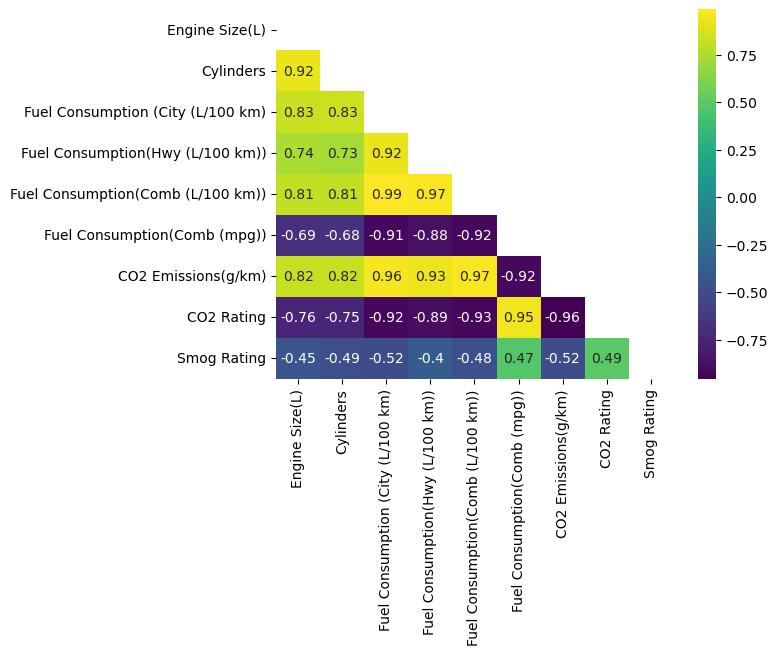

In [21]:
# For all numeric cols

lower = np.triu(data.corr(numeric_only=True))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='viridis', mask=lower)

* Some of the numeric columns are having linear relationships

                                                        C-N: Aggregations

In [22]:
# Make vs Fuel Consumption

data.groupby('Make')['Fuel Consumption (City (L/100 km)'].mean()

Make
acura           11.49
alfa romeo      11.50
aston martin    14.82
audi            12.06
bentley         17.44
bmw             12.74
bugatti         28.55
buick           10.24
cadillac        12.72
chevrolet       13.87
chrysler        13.28
dodge           15.57
fiat            10.00
ford            13.18
genesis         12.74
gmc             14.76
honda            9.01
hyundai          8.81
infiniti        12.56
jaguar          13.00
jeep            12.47
kia              9.14
lamborghini     21.70
land rover      14.56
lexus           10.98
lincoln         12.49
maserati        15.57
mazda            9.44
mercedes-benz   11.78
mini             9.46
mitsubishi       9.01
nissan           9.85
porsche         13.99
ram             13.78
rolls-royce     20.00
subaru          10.08
toyota           9.37
volkswagen      10.13
volvo           10.70
Name: Fuel Consumption (City (L/100 km), dtype: float64

In [23]:
px.box(data, x="Fuel Type", y="Fuel Consumption (City (L/100 km)")

                                                        C-C: FDT

In [24]:
# Vehicle class vs Fuel Type

pd.crosstab(data['Vehicle Class'], data['Fuel Type'], margins=True)

Fuel Type,d,e,x,z,All
Vehicle Class,,,,,
compact,0,0,31,37,68
full-size,0,0,27,27,54
mid-size,0,0,50,55,105
minicompact,0,0,0,43,43
minivan,0,0,6,0,6
pickup truck: small,5,0,15,0,20
pickup truck: standard,12,12,78,10,112
special purpose vehicle,0,2,7,2,11
station wagon: mid-size,0,0,1,6,7


### 3. Handling Missing Values & Outliers<a id='naout'>
    
[Back to Top](#menu)
    
**3.1 NaN (missing data in columns)**

In [25]:
data.isnull().sum()

Make                                 0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

* No na

**3.2 Outliers Handling**

In [26]:
# Taking user defined module

from outlier import outlier_detect, outlier_replacement

In [27]:
outcols = outlier_detect(data)

Column: Engine Size(L)
------------------------------------------------
Boxplot For Outlier Identification:



********* Outlier Data Points *******

Lower Outliers:
[]


Upper Outliers:
[6.2, 6.4, 6.5, 6.6, 6.7, 8.0]


Column: Cylinders
------------------------------------------------
Boxplot For Outlier Identification:



********* Outlier Data Points *******

Lower Outliers:
[]


Upper Outliers:
[10, 12, 16]


Column: Fuel Consumption (City (L/100 km)
------------------------------------------------
Boxplot For Outlier Identification:



********* Outlier Data Points *******

Lower Outliers:
[]


Upper Outliers:
[20.7, 20.8, 21.2, 21.5, 22.0, 22.4, 23.1, 26.5, 26.8, 30.3]


Column: Fuel Consumption(Hwy (L/100 km))
------------------------------------------------
Boxplot For Outlier Identification:



********* Outlier Data Points *******

Lower Outliers:
[]


Upper Outliers:
[15.1, 16.0, 16.4, 16.5, 16.6, 19.6, 20.9]


Column: Fuel Consumption(Comb (L/100 km))
------------------------------------------------
Boxplot For Outlier Identification:



********* Outlier Data Points *******

Lower Outliers:
[]


Upper Outliers:
[18.1, 19.1, 19.5, 19.8, 21.2, 21.5, 22.2, 26.1]


Column: Fuel Consumption(Comb (mpg))
------------------------------------------------
Boxplot For Outlier Identification:



********* Outlier Data Points *******

Lower Outliers:
[]


Upper Outliers:
[45, 46, 47, 48, 49, 51, 53, 55, 56, 58, 59, 61, 63, 64, 67, 71]


Column: CO2 Emissions(g/km)
------------------------------------------------
Boxplot For Outlier Identification:



********* Outlier Data Points *******

Lower Outliers:
[]


Upper Outliers:
[465, 489, 498, 522, 608]


Column: CO2 Rating
------------------------------------------------
Boxplot For Outlier Identification:



********* Outlier Data Points *******

Lower Outliers:
[1, 2]


Upper Outliers:
[7, 8, 9, 10]


Column: Smog Rating
------------------------------------------------
Boxplot For Outlier Identification:



********* Outlier Data Points *******

Lower Outliers:
[1, 3]


Upper Outliers:
[]




* We have one outliers in Columns

In [28]:
# Handling Outliers by replacing values with nearest values (5th and 95th percentile)

outlier_replacement(data, outcols)

Column: Engine Size(L)
------------------------------------------------
Replacing Outliers with 5th percentile for lower Outliers, 95th percentile for Upper Outliers....
Adjust the module code for any other replacements.........

Column: Cylinders
------------------------------------------------
Replacing Outliers with 5th percentile for lower Outliers, 95th percentile for Upper Outliers....
Adjust the module code for any other replacements.........

Column: Fuel Consumption (City (L/100 km)
------------------------------------------------
Replacing Outliers with 5th percentile for lower Outliers, 95th percentile for Upper Outliers....
Adjust the module code for any other replacements.........

Column: Fuel Consumption(Hwy (L/100 km))
------------------------------------------------
Replacing Outliers with 5th percentile for lower Outliers, 95th percentile for Upper Outliers....
Adjust the module code for any other replacements.........

Column: Fuel Consumption(Comb (L/100 km))
------

In [29]:
# Final Check of Outliers

outlier_detect(data)

Column: Engine Size(L)
------------------------------------------------
Boxplot For Outlier Identification:



********* Outlier Data Points *******

Lower Outliers:
[]


Upper Outliers:
[]


Column: Cylinders
------------------------------------------------
Boxplot For Outlier Identification:



********* Outlier Data Points *******

Lower Outliers:
[]


Upper Outliers:
[]


Column: Fuel Consumption (City (L/100 km)
------------------------------------------------
Boxplot For Outlier Identification:



********* Outlier Data Points *******

Lower Outliers:
[]


Upper Outliers:
[]


Column: Fuel Consumption(Hwy (L/100 km))
------------------------------------------------
Boxplot For Outlier Identification:



********* Outlier Data Points *******

Lower Outliers:
[]


Upper Outliers:
[]


Column: Fuel Consumption(Comb (L/100 km))
------------------------------------------------
Boxplot For Outlier Identification:



********* Outlier Data Points *******

Lower Outliers:
[]


Upper Outliers:
[]


Column: Fuel Consumption(Comb (mpg))
------------------------------------------------
Boxplot For Outlier Identification:



********* Outlier Data Points *******

Lower Outliers:
[]


Upper Outliers:
[]


Column: CO2 Emissions(g/km)
------------------------------------------------
Boxplot For Outlier Identification:



********* Outlier Data Points *******

Lower Outliers:
[]


Upper Outliers:
[]


Column: CO2 Rating
------------------------------------------------
Boxplot For Outlier Identification:



********* Outlier Data Points *******

Lower Outliers:
[2]


Upper Outliers:
[7]


Column: Smog Rating
------------------------------------------------
Boxplot For Outlier Identification:



********* Outlier Data Points *******

Lower Outliers:
[3]


Upper Outliers:
[]




['CO2 Rating', 'Smog Rating']

* Almost all the outliers in columns are replaced

### @ 4. Predictive Modeling<a id='pm'>

[Back to Top](#menu)

**4.1 Input (x) and output(y) column for modeling from data**<a id='xy'>
    
[Back to Top](#menu)

In [30]:
data.head(2)

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,acura,compact,2.40,4,am8,z,9.90,7.00,8.60,33,200,6,3
1,acura,suv: small,3.50,6,as10,z,12.60,9.40,11.20,25,263,4,5


                                Considering FuelConsumption City Col as y dependent variable

In [31]:
X = data.drop('Fuel Consumption (City (L/100 km)', axis=1)
y = data['Fuel Consumption (City (L/100 km)']

In [32]:
X.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,acura,compact,2.40,4,am8,z,7.00,8.60,33,200,6,3
1,acura,suv: small,3.50,6,as10,z,9.40,11.20,25,263,4,5
2,acura,suv: small,2.00,4,as10,z,8.60,9.90,29,232,5,6
3,acura,suv: small,2.00,4,as10,z,9.10,10.30,27,242,5,6
4,acura,compact,2.00,4,as10,z,8.00,9.80,29,230,5,7


In [33]:
y.head()

0    9.90
1   12.60
2   11.00
3   11.30
4   11.20
Name: Fuel Consumption (City (L/100 km), dtype: float64

#### 4.2 Feature Engineering (selecting proper x data for modeling)<a id='fe'>
   
[Back to Top](#menu)

* Feature selection/Deletion
    - The above step can be done through the help of Business Decisions or EDA
* Feature Generation (Creating New Features) - Which can be done in Data Validation Step
* Feature Modification (Changing the Values) - if required

**4.2.1 Feature Selection/Drop**

In [34]:
X.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,acura,compact,2.40,4,am8,z,7.00,8.60,33,200,6,3
1,acura,suv: small,3.50,6,as10,z,9.40,11.20,25,263,4,5
2,acura,suv: small,2.00,4,as10,z,8.60,9.90,29,232,5,6
3,acura,suv: small,2.00,4,as10,z,9.10,10.30,27,242,5,6
4,acura,compact,2.00,4,as10,z,8.00,9.80,29,230,5,7


* Business POV, Droping Model, Other fuel consumption columns

In [35]:
X.columns

Index(['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission',
       'Fuel Type', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [36]:
X = X.drop(['Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))'], axis=1)

In [37]:
X.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,acura,compact,2.40,4,am8,z,200,6,3
1,acura,suv: small,3.50,6,as10,z,263,4,5
2,acura,suv: small,2.00,4,as10,z,232,5,6
3,acura,suv: small,2.00,4,as10,z,242,5,6
4,acura,compact,2.00,4,as10,z,230,5,7


                                The remaining columns are considered as important for y

In [38]:
# Saving above input data for model deployment

X.to_csv("FuelInpData.csv", index=False)

**4.2.2 Data Pre-Processing (Feature Modification)**

**Encoding:** - Converting Categorical Cols to Numeric

In [39]:
X.select_dtypes("O")

,Make,Vehicle Class,Transmission,Fuel Type
0,acura,compact,am8,z
1,acura,suv: small,as10,z
2,acura,suv: small,as10,z
3,acura,suv: small,as10,z
4,acura,compact,as10,z
...,...,...,...,...
838,volvo,suv: small,as8,z
839,volvo,suv: small,as8,z
840,volvo,suv: small,as8,z
841,volvo,suv: standard,as8,z


In [40]:
# Checking each column unique values

for col in X.select_dtypes("O").columns:
    print(col)
    print("Count of Classes:", X[col].nunique())
    print(X[col].unique())
    print()

Make
Count of Classes: 39
['acura' 'alfa romeo' 'aston martin' 'audi' 'bentley' 'bmw' 'bugatti'
 'buick' 'cadillac' 'chevrolet' 'chrysler' 'dodge' 'fiat' 'ford' 'genesis'
 'gmc' 'honda' 'hyundai' 'infiniti' 'jaguar' 'jeep' 'kia' 'lamborghini'
 'land rover' 'lexus' 'lincoln' 'maserati' 'mazda' 'mercedes-benz' 'mini'
 'mitsubishi' 'nissan' 'porsche' 'ram' 'rolls-royce' 'subaru' 'toyota'
 'volkswagen' 'volvo']

Vehicle Class
Count of Classes: 14
['compact' 'suv: small' 'mid-size' 'minicompact' 'suv: standard'
 'two-seater' 'subcompact' 'station wagon: small'
 'station wagon: mid-size' 'full-size' 'pickup truck: small'
 'pickup truck: standard' 'minivan' 'special purpose vehicle']

Transmission
Count of Classes: 23
['am8' 'as10' 'a8' 'a9' 'am7' 'as8' 'm6' 'as6' 'av' 'as9' 'a10' 'a6' 'm5'
 'm7' 'av7' 'av1' 'am6' 'as7' 'av8' 'av6' 'av10' 'as5' 'a7']

Fuel Type
Count of Classes: 4
['z' 'x' 'd' 'e']



* From above, each column is having more than two classes
* Need to Identify ordinal and nominal columns to apply proper encoding
    - Ordinal Encoding - for Ordinal Cols
    - One-Hot Encoding - for Nominal Cols

                                                    Deciding Ordinal or Nominal
                                                    
* We can decide from business discussions or compare with y

In [41]:
# We have x cat and y numeric : groupby aggregations

for col in X.select_dtypes("O").columns:
    grouped = round(data.groupby(col)['Fuel Consumption (City (L/100 km)'].mean(),2)
    display(grouped)

Make
acura           11.49
alfa romeo      11.50
aston martin    14.82
audi            12.06
bentley         17.44
bmw             12.74
bugatti         18.00
buick           10.24
cadillac        12.72
chevrolet       13.69
chrysler        13.28
dodge           15.57
fiat            10.00
ford            13.08
genesis         12.74
gmc             14.48
honda            9.01
hyundai          8.81
infiniti        12.56
jaguar          13.00
jeep            12.47
kia              9.14
lamborghini     18.24
land rover      14.56
lexus           10.98
lincoln         12.49
maserati        15.57
mazda            9.44
mercedes-benz   11.78
mini             9.46
mitsubishi       9.01
nissan           9.85
porsche         13.99
ram             13.51
rolls-royce     20.00
subaru          10.08
toyota           9.37
volkswagen      10.13
volvo           10.70
Name: Fuel Consumption (City (L/100 km), dtype: float64

Vehicle Class
compact                    9.95
full-size                 11.96
mid-size                  10.89
minicompact               13.56
minivan                   10.68
pickup truck: small       12.43
pickup truck: standard    14.72
special purpose vehicle   11.71
station wagon: mid-size   13.43
station wagon: small       9.24
subcompact                12.38
suv: small                10.63
suv: standard             14.15
two-seater                13.86
Name: Fuel Consumption (City (L/100 km), dtype: float64

Transmission
a10    14.74
a6     14.50
a7      9.50
a8     13.68
a9     11.80
am6     5.26
am7    11.91
am8    13.50
as10   13.57
as5    14.85
as6    10.66
as7    13.36
as8    12.36
as9    11.75
av      7.16
av1     7.45
av10    8.16
av6     7.82
av7     8.96
av8     9.47
m5      8.78
m6     11.87
m7     13.72
Name: Fuel Consumption (City (L/100 km), dtype: float64

Fuel Type
d   11.25
e   17.44
x   11.13
z   13.22
Name: Fuel Consumption (City (L/100 km), dtype: float64

* **from the above except fuel type all columns can be considered as ordinal**

* **Ordinal Encoding**

In [42]:
X[['Make','Vehicle Class','Transmission']]

,Make,Vehicle Class,Transmission
0,acura,compact,am8
1,acura,suv: small,as10
2,acura,suv: small,as10
3,acura,suv: small,as10
4,acura,compact,as10
...,...,...,...
838,volvo,suv: small,as8
839,volvo,suv: small,as8
840,volvo,suv: small,as8
841,volvo,suv: standard,as8


* We can replace above cat classes with ordinal numbers, 
    - Those numbers can be,
        - target encoding: avg output value according to class or
        - ordinal number according to alphabetical order
        - or our own choice of numbers

* **for the above ordinal cols considering target encoding**

In [43]:
# Writing a loop

import pickle # Module to save encoding dictionaries

for col in X[['Make','Vehicle Class','Transmission']].columns:
    grouped = round(data.groupby(col)['Fuel Consumption (City (L/100 km)'].mean(),2)
    ordencoding = {brand:value for brand, value in zip(grouped.index, grouped.values)}
    # saving above encoding for future use
    with open(f'{col}_encoding.pkl', 'wb') as f:
        pickle.dump(ordencoding, f)
        
    X[col].replace(ordencoding, inplace=True)    
    
# To load encoding for future use 

# with open('saved_dictionary.pkl', 'rb') as f:
#     loaded_dict = pickle.load(f)

In [44]:
X.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,11.49,9.95,2.40,4,13.50,z,200,6,3
1,11.49,10.63,3.50,6,13.57,z,263,4,5
2,11.49,10.63,2.00,4,13.57,z,232,5,6
3,11.49,10.63,2.00,4,13.57,z,242,5,6
4,11.49,9.95,2.00,4,13.57,z,230,5,7


* **One-Hot Encoding**

In [45]:
X.select_dtypes("O")

,Fuel Type
0,z
1,z
2,z
3,z
4,z
...,...
838,z
839,z
840,z
841,z


In [46]:
# Library
from sklearn.preprocessing import OneHotEncoder

# Define Object
ohe = OneHotEncoder(handle_unknown='ignore')

# handle_unknown=ignore -> future classes will be ignored
# drop=first -> is another param for dummy variable trap

In [47]:
# Using fit_transform method to convert column data into onehot encodings

ohedata = ohe.fit_transform(X[['Fuel Type']]).toarray()

In [48]:
# Converting to dataframe

ohedata = pd.DataFrame(ohedata, columns=ohe.get_feature_names_out())

In [49]:
ohedata

,Fuel Type_d,Fuel Type_e,Fuel Type_x,Fuel Type_z
0,0.00,0.00,0.00,1.00
1,0.00,0.00,0.00,1.00
2,0.00,0.00,0.00,1.00
3,0.00,0.00,0.00,1.00
4,0.00,0.00,0.00,1.00
...,...,...,...,...
838,0.00,0.00,0.00,1.00
839,0.00,0.00,0.00,1.00
840,0.00,0.00,0.00,1.00
841,0.00,0.00,0.00,1.00


* Adding above one hot encoded data to X 

In [50]:
# Droping Fuel Type with Ohedata

X = pd.concat([X.drop('Fuel Type', axis=1), ohedata], axis=1)

* **Final Encoded Data**

In [51]:
X.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,CO2 Emissions(g/km),CO2 Rating,Smog Rating,Fuel Type_d,Fuel Type_e,Fuel Type_x,Fuel Type_z
0,11.49,9.95,2.40,4,13.50,200,6,3,0.00,0.00,0.00,1.00
1,11.49,10.63,3.50,6,13.57,263,4,5,0.00,0.00,0.00,1.00
2,11.49,10.63,2.00,4,13.57,232,5,6,0.00,0.00,0.00,1.00
3,11.49,10.63,2.00,4,13.57,242,5,6,0.00,0.00,0.00,1.00
4,11.49,9.95,2.00,4,13.57,230,5,7,0.00,0.00,0.00,1.00


**Scaling**

- Transforming Numeric Cols data under one scale if there is a scale difference
- Taking Standard Scale

In [52]:
# Module
from sklearn.preprocessing import StandardScaler

# Object Define
sc = StandardScaler()

In [53]:
# Considering only the main numeric cols, not one hot encoded cols

X.iloc[:, 0:8]

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,11.49,9.95,2.40,4,13.50,200,6,3
1,11.49,10.63,3.50,6,13.57,263,4,5
2,11.49,10.63,2.00,4,13.57,232,5,6
3,11.49,10.63,2.00,4,13.57,242,5,6
4,11.49,9.95,2.00,4,13.57,230,5,7
...,...,...,...,...,...,...,...,...
838,10.70,10.63,2.00,4,12.36,219,5,5
839,10.70,10.63,2.00,4,12.36,219,5,5
840,10.70,10.63,2.00,4,12.36,232,5,7
841,10.70,14.15,2.00,4,12.36,236,5,5


In [54]:
# Applying fit_transform on selected cols

X.iloc[:, 0:8] = sc.fit_transform(X.iloc[:, 0:8])

**Final X Data After feature engineering**

In [55]:
X.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,CO2 Emissions(g/km),CO2 Rating,Smog Rating,Fuel Type_d,Fuel Type_e,Fuel Type_x,Fuel Type_z
0,-0.32,-1.29,-0.53,-0.89,0.67,-0.89,1.03,-1.54,0.00,0.00,0.00,1.00
1,-0.32,-0.89,0.33,0.37,0.71,0.16,-0.45,-0.12,0.00,0.00,0.00,1.00
2,-0.32,-0.89,-0.84,-0.89,0.71,-0.35,0.29,0.59,0.00,0.00,0.00,1.00
3,-0.32,-0.89,-0.84,-0.89,0.71,-0.19,0.29,0.59,0.00,0.00,0.00,1.00
4,-0.32,-1.29,-0.84,-0.89,0.71,-0.39,0.29,1.30,0.00,0.00,0.00,1.00


In [56]:
y.head()

0    9.90
1   12.60
2   11.00
3   11.30
4   11.20
Name: Fuel Consumption (City (L/100 km), dtype: float64

**4.3 Train_Test Split (Data Validation)**<a id='tt'>
    
[Back to Top](#menu)

<img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_train-test-split_0.jpg" width=600 height=400 />

In [57]:
# Module
from sklearn.model_selection import train_test_split

In [58]:
# Split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=123)

In [59]:
# Checking Shapes
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((632, 12), (211, 12), (632,), (211,))

* Data Used for Model Training

In [60]:
display(xtrain.head())
display(ytrain.head())

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,CO2 Emissions(g/km),CO2 Rating,Smog Rating,Fuel Type_d,Fuel Type_e,Fuel Type_x,Fuel Type_z
200,0.73,1.16,2.29,1.63,1.30,1.67,-1.19,0.59,0.00,0.00,0.00,1.00
763,-1.32,1.16,0.72,0.37,1.35,1.13,-1.19,-0.12,0.00,0.00,1.00,0.00
752,-0.99,-0.74,-0.84,-0.89,-1.70,-0.74,0.29,1.30,0.00,0.00,1.00,0.00
779,-1.32,-1.29,-0.84,-0.89,-2.01,-1.49,1.78,1.30,0.00,0.00,1.00,0.00
246,0.44,-0.89,-0.84,-0.89,0.10,-0.24,0.29,0.59,0.00,0.00,1.00,0.00


200   17.00
763   14.80
752   10.10
779    7.70
246   11.60
Name: Fuel Consumption (City (L/100 km), dtype: float64

* Data Used for Model Testing/Evaluation

In [61]:
display(xtest.head())
display(ytest.head())

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,CO2 Emissions(g/km),CO2 Rating,Smog Rating,Fuel Type_d,Fuel Type_e,Fuel Type_x,Fuel Type_z
656,-1.10,-0.89,-0.45,-0.89,-1.35,-1.06,1.03,1.30,0.00,0.00,1.00,0.00
275,0.44,1.50,0.17,0.37,0.71,0.05,0.29,0.59,0.00,1.00,0.00,0.00
327,0.28,1.16,0.33,0.37,0.10,0.43,-0.45,-0.12,0.00,0.00,0.00,1.00
285,0.44,1.50,0.33,0.37,0.71,1.95,-1.94,0.59,0.00,0.00,1.00,0.00
280,0.44,1.50,1.51,1.63,0.71,0.91,-1.19,-0.12,0.00,0.00,1.00,0.00


656    9.00
275   17.30
327   12.90
285   16.60
280   15.10
Name: Fuel Consumption (City (L/100 km), dtype: float64

**Model Selection & Python Libraries**

* We have output col data numeric, considering regression algorithms

    - **Regression Models/Algorithms:**
        * Linear Algorithms (when the data is linear to output (having correlation))
            - Linear Regression
            - Polynomial Regression
            - Lasso & Ridge Regression

        * Non-Linear Algorithms (when the data is non-linear to output (not having correlation) using classification algorithms)
            - Decision Tree Regressor
            - RandomForest Regressor
            - Xgboost Regressor
            - Support Vector Regressor
            - K Nearest Neighbors Regressor
            
Note:
    
* Data we got is linear & non-linear

In [62]:
# Algorithm Modules

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#### 4.4 Modeling - Defining & Training <a id='model'>

[Back to Top](#menu)

In [63]:
# Multiple Linear Regression 

mlr = LinearRegression()

# Polynomial Regression

polyfeat = PolynomialFeatures(degree = 2)  # degree is hyperparam

poly = LinearRegression()

# Lasso (L1) & Ridge (L2)

lasso = Lasso(alpha = 5) # alpha/lambda - hyperparam - penalty

ridge = Ridge(alpha = 5)



# KNN

knnr = KNeighborsRegressor(n_neighbors=5) # n_neighbors - hyper param

# Support Vector Regressor

svr = SVR(kernel='rbf') # non-linear kernel for non-linear data

# Decision Tree Regressor

dtr = DecisionTreeRegressor()

# Random Forest regressor 

rfr = RandomForestRegressor() # n_estimators - hyperparam - number of decision trees

# Xgb

xgbr = XGBRegressor()

                                                Training above defined models one by one
                                                        
                                                     (with xtrain, ytrain)

* We can use fit method on above objects to train model

**4.4.1 Linear regression**

In [64]:
# Model Training

mlr.fit(xtrain, ytrain)

LinearRegression()

                                                            Model Params

In [65]:
mlr.coef_, mlr.intercept_

(array([ 0.0782649 , -0.1348502 ,  0.17218942,  0.08090072,  0.09936537,
         2.82136486,  0.15154998, -0.08730556, -2.03277549,  2.35163351,
        -0.28474681, -0.03411122]),
 12.328911039372437)

In [66]:
eq = str(round(mlr.intercept_,2))

for i,j in zip(xtrain.columns,mlr.coef_):
    mx = '{}*{}'.format(i,round(j,2))
    eq = eq+" + "+mx

In [67]:
eq

'12.33 + Make*0.08 + Vehicle Class*-0.13 + Engine Size(L)*0.17 + Cylinders*0.08 + Transmission*0.1 + CO2 Emissions(g/km)*2.82 + CO2 Rating*0.15 + Smog Rating*-0.09 + Fuel Type_d*-2.03 + Fuel Type_e*2.35 + Fuel Type_x*-0.28 + Fuel Type_z*-0.03'

**4.4.2 Polynomial Regression**

**The Dimensionality will become more and will take heavy run time if we take all the inputs**

In [68]:
xtrain.head(2)

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,CO2 Emissions(g/km),CO2 Rating,Smog Rating,Fuel Type_d,Fuel Type_e,Fuel Type_x,Fuel Type_z
200,0.73,1.16,2.29,1.63,1.30,1.67,-1.19,0.59,0.00,0.00,0.00,1.00
763,-1.32,1.16,0.72,0.37,1.35,1.13,-1.19,-0.12,0.00,0.00,1.00,0.00


In [69]:
# Converting x data to poly features

xtrain_poly = polyfeat.fit_transform(xtrain) # fit_transform on train

xtest_poly = polyfeat.transform(xtest) # transform on test

In [70]:
xtrain_poly.shape, xtest_poly.shape

((632, 91), (211, 91))

In [71]:
# Applying Linear Regression to above polynomial features

poly.fit(xtrain_poly, ytrain)

LinearRegression()

In [72]:
# params

poly.coef_, poly.intercept_

(array([ 7.66801868e-16,  2.93264413e+11, -1.83451886e+11,  4.56388578e+11,
        -6.95863537e+10,  4.92336067e+10,  3.34218003e+10, -2.19570997e+11,
         5.14715298e+09, -4.74829223e+10,  1.08485669e+11, -9.05354900e+10,
        -1.52657773e+11,  1.67541504e-02, -3.90472412e-02,  2.42385864e-02,
        -6.50177002e-02,  2.34870911e-02,  2.64579773e-01,  1.39228821e-01,
        -4.63256836e-02, -2.93264413e+11, -2.93264413e+11, -2.93264413e+11,
        -2.93264413e+11, -1.08108521e-01, -2.26135254e-01,  3.31115723e-02,
         1.83105469e-04,  9.65728760e-02, -9.86633301e-02,  1.66320801e-03,
         1.83451886e+11,  1.28834065e+11,  1.83451886e+11,  1.83451886e+11,
        -9.34143066e-02,  2.39669800e-01,  2.29122162e-01, -9.06677246e-02,
        -7.96966553e-02, -3.06701660e-02,  4.21750949e+09, -1.99635019e+11,
        -4.56388578e+11, -4.56388578e+11, -1.85050964e-01, -1.70410156e-01,
         1.74175262e-01, -8.97750854e-02,  5.57250977e-02,  1.22568628e+10,
        -1.5

**4.4.3 Lasso and Ridge**

In [73]:
# Model Training

lasso.fit(xtrain,ytrain)
ridge.fit(xtrain,ytrain)

Ridge(alpha=5)

In [74]:
lasso.intercept_, lasso.coef_

(12.079113924050633,
 array([ 0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,  0.]))

In [75]:
ridge.intercept_, ridge.coef_

(12.223394779949126,
 array([ 0.08232267, -0.11631392,  0.23948599,  0.0957408 ,  0.11079576,
         2.44187837, -0.13507597, -0.08723892, -1.44065439,  1.53848927,
        -0.17959612,  0.08176123]))

**4.4.4 KNN Regressor**

In [76]:
knnr.fit(xtrain, ytrain)

KNeighborsRegressor()

In [77]:
knnr.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**4.4.5 Support Vector Regressor**

In [78]:
svr.fit(xtrain, ytrain)

SVR()

In [79]:
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**4.4.6 Decision Tree Regressor**

In [80]:
dtr.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [81]:
# Model Params

print("Model Params:")
print(dtr.get_params())
print()
print("Columns Importance:")
print()
for i, j in zip(dtr.feature_names_in_, dtr.feature_importances_):
    print(i+": "+str(round(j,2)))

Model Params:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Columns Importance:

Make: 0.0
Vehicle Class: 0.0
Engine Size(L): 0.01
Cylinders: 0.0
Transmission: 0.0
CO2 Emissions(g/km): 0.97
CO2 Rating: 0.0
Smog Rating: 0.0
Fuel Type_d: 0.0
Fuel Type_e: 0.01
Fuel Type_x: 0.0
Fuel Type_z: 0.0


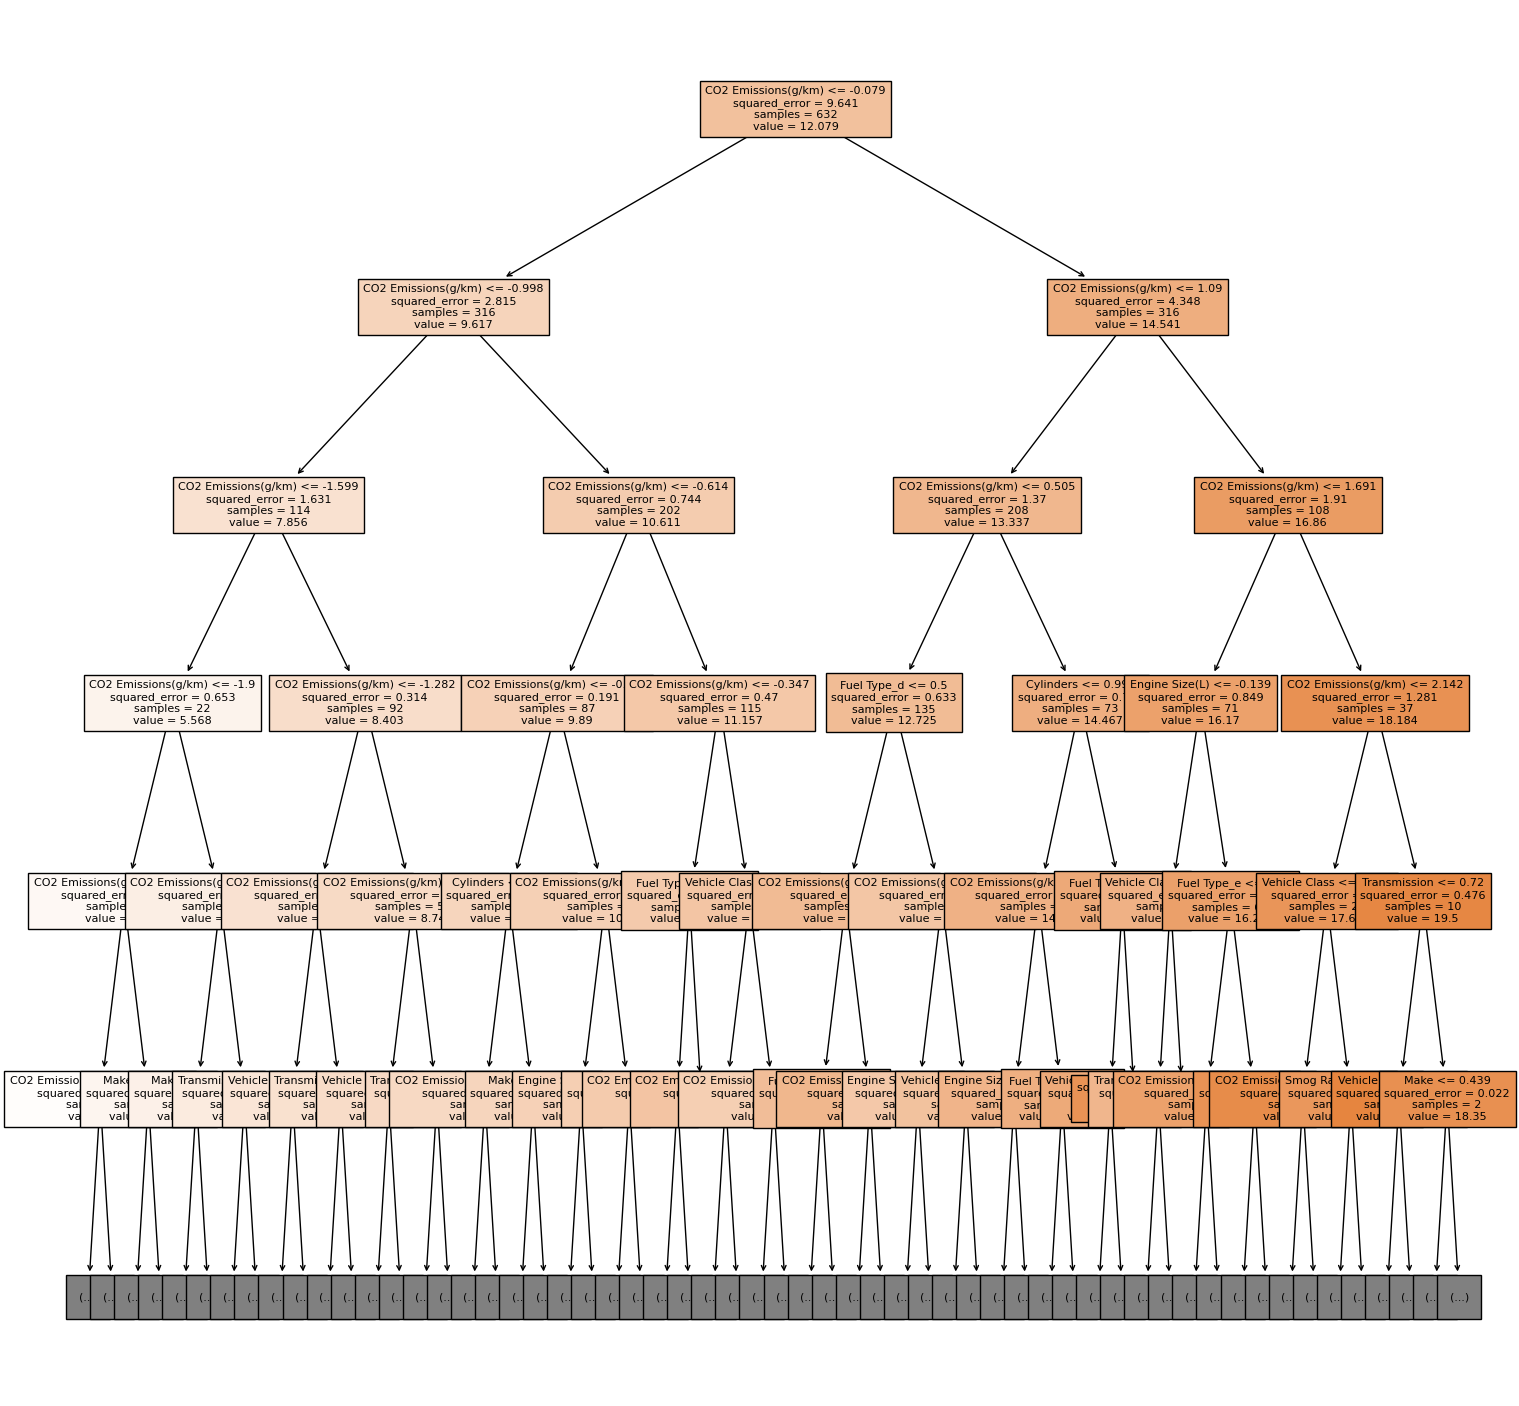

In [82]:
# Tree Visualization

from sklearn.tree import plot_tree

plt.figure(figsize=(18,18))
plot_tree(dtr,filled=True,fontsize=8,feature_names=list(xtrain.columns),max_depth=5)
plt.show()

**4.4.7 Random Forest Regressor**

In [83]:
rfr.fit(xtrain, ytrain)

RandomForestRegressor()

In [84]:
# Model Params

print("Model Params:")
print(rfr.get_params())
print()
print("Columns Importance:")
print()
for i, j in zip(rfr.feature_names_in_, rfr.feature_importances_):
    print(i+": "+str(round(j,2)))

Model Params:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Columns Importance:

Make: 0.0
Vehicle Class: 0.0
Engine Size(L): 0.01
Cylinders: 0.0
Transmission: 0.0
CO2 Emissions(g/km): 0.94
CO2 Rating: 0.03
Smog Rating: 0.0
Fuel Type_d: 0.0
Fuel Type_e: 0.01
Fuel Type_x: 0.0
Fuel Type_z: 0.0


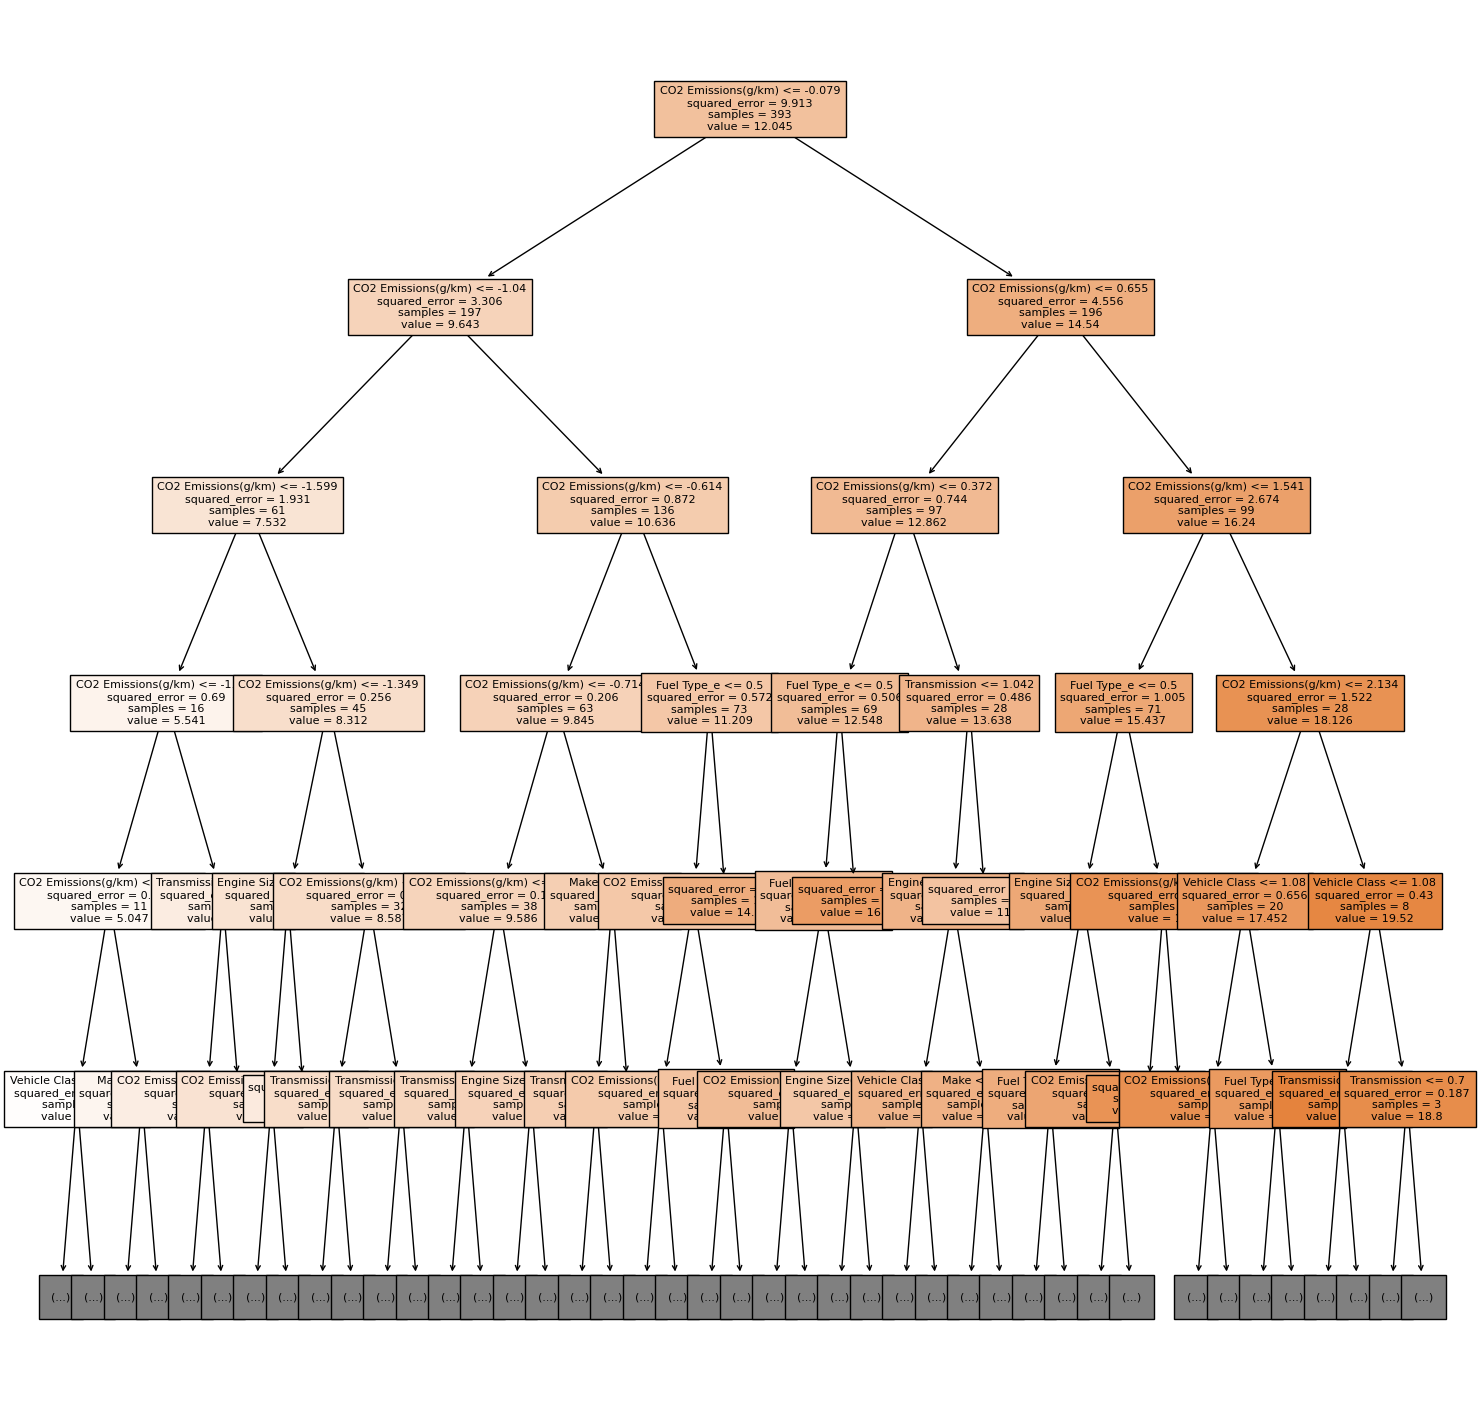

In [85]:
# One Tree Visualization

from sklearn.tree import plot_tree

plt.figure(figsize=(18,18))
plot_tree(rfr.estimators_[0],filled=True,fontsize=8,feature_names=list(xtrain.columns),max_depth=5)
plt.show()

**4.4.8 Xgb Regressor**

In [86]:
# Model Training

xgbr.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [87]:
xgbr.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

**4.5 & 4.6 Predictions & Evaluations**<a id='eval'>
    
[Back to Top](#menu)

* Checking trained model performance with test data
* Using xtest data we will be getting predictions, these predictions will be compared to ytest
    - To compare we can use below metrics,
        - Loss Metric: **RMSE**
        - Score/Performance Metric: **R2Score**
* **For regression models , we have following to check model performance**

Technique | Outcome
-------|-----------
**Bias-Variance Trade Off**|Model Fitness Based on Train & Test Metrics
**Crossvalidation**|Checking Trained model performance on entire X and y data

In [88]:
# Libraries

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

* Looping through each trained model for test predictions, & evalaution 

In [89]:
names = ['Multiple Linear Regression','Polynomial Regression','Lasso Regression','Ridge Regression',
         'Knn Regressor', 'Svm Regressor', 'Decision Tree Regressor', 'RandomForest Regressor', 'Xgboost Regressor']

models = {'mlr':mlr, 'poly':poly, 'lasso':lasso, 'ridge':ridge,  'knn':knnr, 'svm':svr, 'dt':dtr, 'rf':rfr, 'xgb':xgbr}

In [90]:
# Taking User-Defined Module

from mleval import regval

In [91]:
trainrmse, testrmse, trainr2, testr2, crossvalscore, fit = regval(xtrain, xtrain_poly, xtest, xtest_poly, ytrain, ytest, models)

In [92]:
# Complete Model Evaluation Table
# Display Options for Table
pd.set_option('display.float_format', lambda x: '%.3f' % x)

display(pd.DataFrame({'Model':names, 'TrainRMSE':trainrmse, 'TestRMSE':testrmse,
             'Trainscore':trainr2, 'Testscore':testr2, 'Crossvalscore':crossvalscore, 'Fit':fit}))

,Model,TrainRMSE,TestRMSE,Trainscore,Testscore,Crossvalscore,Fit
0,Multiple Linear Regression,0.420,0.520,0.980,0.970,0.980,Goodfit
1,Polynomial Regression,0.290,0.380,0.990,0.980,0.980,Goodfit
2,Lasso Regression,3.110,3.120,0.000,-0.010,-0.010,Underfit
3,Ridge Regression,0.440,0.610,0.980,0.960,0.980,Goodfit
4,Knn Regressor,0.590,0.850,0.960,0.920,0.940,Goodfit
5,Svm Regressor,0.480,0.720,0.980,0.950,0.960,Goodfit
6,Decision Tree Regressor,0.020,0.500,1.000,0.970,0.970,Goodfit
7,RandomForest Regressor,0.170,0.530,1.000,0.970,0.980,Goodfit
8,Xgboost Regressor,0.040,0.400,1.000,0.980,0.990,Goodfit


#### Model Performance Improve notes (Suggestions)

* All models are good except Lasso

**4.7 Best Model**<a id='best'>
    
[Back to Top](#menu)

In [93]:
# Taking output col distribution

y.describe()

count   843.000
mean     12.156
std       3.111
min       4.000
25%      10.050
50%      12.000
75%      14.300
max      20.300
Name: Fuel Consumption (City (L/100 km), dtype: float64

* By observing y col distribution it is clear that from the above table, test rmse values are very low apart from lasso regression
* According to above table , we can select **Linear Regression** is better performance model for this data (low test rmse , high r2score, matching cross val score to test)

**4.8 Hyp Param Tuning**<a id='hyp'>
    
[Back to Top](#menu)
    
- Not Suggested for Linear Regression

**4.9 Saving Model**<a id='dep'>
    
[Back to Top](#menu)
                                                    
- Saving Trained & Evaluated model for future predictions
    - From above training we need to save **mlr & ohe, sc** objects
    - In python we have libraries , joblib, pickle to save model files

In [94]:
# Module

import joblib

In [95]:
# Saving above mentioned object files

joblib.dump(ohe,'ohe.pkl')
joblib.dump(sc, "sc.pkl")
joblib.dump(mlr, "fuel_linreg.pkl")

['fuel_linreg.pkl']

**4.10 Real Time Prediction**<a id='pred'>
    
[Back to Top](#menu)

In [96]:
# Loading Saved object files

ohe = joblib.load('ohe.pkl')
sc = joblib.load("sc.pkl")
model = joblib.load("fuel_linreg.pkl")

# Loading Saved Ordinal Encoded files
with open('Make_encoding.pkl', 'rb') as f:
    make_encoding = pickle.load(f)
    
with open('Transmission_encoding.pkl', 'rb') as f:
    trans_encoding = pickle.load(f)
    
with open("Vehicle Class_encoding.pkl", 'rb') as f:
    vclass_encoding = pickle.load(f)

In [97]:
def FuelConsumptionEstimate():
    
    print("Estimation of Fuel Consumption Built on Below Input Data:")
    inpdata = pd.read_csv("FuelInpData.csv")
    display(inpdata.head())
    print()
    print("  Enter Any Vehicle Details For Fuel Consumption Estimation:  ")
    print("==============================================================")
    print()
    print(inpdata.Make.unique())
    make = input("Select Make:")
    print()
    print(inpdata['Vehicle Class'].unique())
    vclass = input("Select Vehicle Class:")
    print()
    esize = eval(input(f"Enter Engine Size, Range-{inpdata['Engine Size(L)'].min()} to {inpdata['Engine Size(L)'].max()}:"))
    cylinders = eval(input(f"Enter Number of Cylinders, Range-{inpdata['Cylinders'].min()} to {inpdata['Cylinders'].max()}:"))
    print()
    print(inpdata['Transmission'].unique())
    trans = input("Select Vehicle Transmission:")
    print()
    print(inpdata['Fuel Type'].unique())
    fuel = input("Select Vehicle FuelType:")
    print()
    co2 = eval(input(f"Enter CO2 Emissions(g/km), Range-{inpdata['CO2 Emissions(g/km)'].min()} to {inpdata['CO2 Emissions(g/km)'].max()}:"))
    co2r = eval(input(f"Enter CO2 Rating, Range-{inpdata['CO2 Rating'].min()} to {inpdata['CO2 Rating'].max()}:"))
    smogr = eval(input(f"Enter Smog Rating, Range-{inpdata['Smog Rating'].min()} to {inpdata['Smog Rating'].max()}:"))
    
    
    row = pd.DataFrame([[make,vclass,esize,cylinders,trans,fuel,co2,co2r,smogr]], columns=inpdata.columns)
    
    print()
    print("Given Vehicle Input Data:")
    
    display(row)
    print()
    
    # Feature Engineering: Need to apply same steps done for training, while giving it to model for prediction
    
    # Ordinal Encoding
    row['Make'].replace(make_encoding, inplace=True)
    row['Vehicle Class'].replace(vclass_encoding, inplace=True)
    row['Transmission'].replace(trans_encoding, inplace=True)
    
    # One-Hot Encoding
    row_ohe = ohe.transform(row[['Fuel Type']]).toarray()
    row_ohe = pd.DataFrame(row_ohe, columns=ohe.get_feature_names_out())
    
    row = pd.concat([row.drop('Fuel Type', axis=1), row_ohe], axis=1)
    
    # Scaling
    row.iloc[:, 0:8] = sc.transform(row.iloc[:, 0:8])
    
    # Prediction
    fuelconsumption = round(model.predict(row)[0],2)
    print(f"Estimated Fuel Consumption (City (L/100Km)): {fuelconsumption}")

In [98]:
FuelConsumptionEstimate()

Estimation of Fuel Consumption Built on Below Input Data:


,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,acura,compact,2.400,4,am8,z,200,6,3
1,acura,suv: small,3.500,6,as10,z,263,4,5
2,acura,suv: small,2.000,4,as10,z,232,5,6
3,acura,suv: small,2.000,4,as10,z,242,5,6
4,acura,compact,2.000,4,as10,z,230,5,7



  Enter Any Vehicle Details For Fuel Consumption Estimation:  

['acura' 'alfa romeo' 'aston martin' 'audi' 'bentley' 'bmw' 'bugatti'
 'buick' 'cadillac' 'chevrolet' 'chrysler' 'dodge' 'fiat' 'ford' 'genesis'
 'gmc' 'honda' 'hyundai' 'infiniti' 'jaguar' 'jeep' 'kia' 'lamborghini'
 'land rover' 'lexus' 'lincoln' 'maserati' 'mazda' 'mercedes-benz' 'mini'
 'mitsubishi' 'nissan' 'porsche' 'ram' 'rolls-royce' 'subaru' 'toyota'
 'volkswagen' 'volvo']
Select Make:audi

['compact' 'suv: small' 'mid-size' 'minicompact' 'suv: standard'
 'two-seater' 'subcompact' 'station wagon: small'
 'station wagon: mid-size' 'full-size' 'pickup truck: small'
 'pickup truck: standard' 'minivan' 'special purpose vehicle']
Select Vehicle Class:compact

Enter Engine Size, Range-1.2 to 6.0:2.6
Enter Number of Cylinders, Range-3 to 8:5

['am8' 'as10' 'a8' 'a9' 'am7' 'as8' 'm6' 'as6' 'av' 'as9' 'a10' 'a6' 'm5'
 'm7' 'av7' 'av1' 'am6' 'as7' 'av8' 'av6' 'av10' 'as5' 'a7']
Select Vehicle Transmission:as8

['z' 'x' 'd'

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,audi,compact,2.600,5,as8,x,150,5,5



Estimated Fuel Consumption (City (L/100Km)): 7.33
